In [1]:
import numpy as np
import matplotlib.pyplot as plt

from swimnetworks import Dense, Linear
from sklearn.pipeline import Pipeline

rng = np.random.default_rng(42)

Load the data

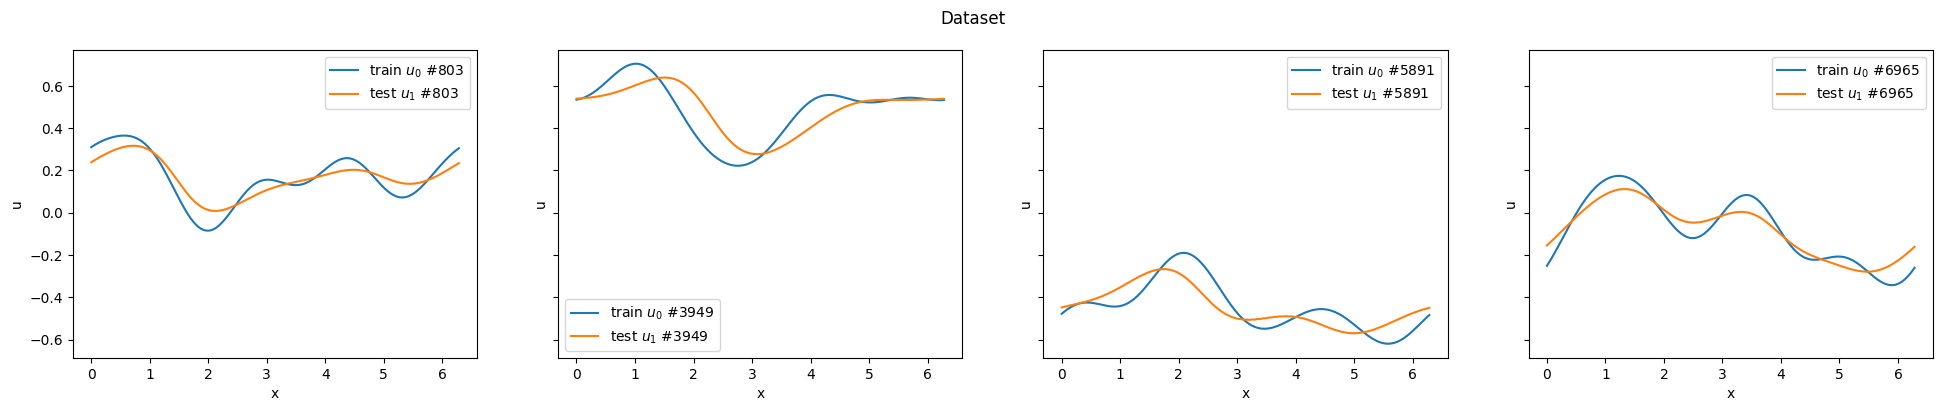

In [2]:
train_u0, train_u1 = np.load("dataset/train.npy")
test_u0, test_u1 = np.load("dataset/test.npy")
x_space = np.linspace(0, 2*np.pi, train_u0.shape[1])

n_to_plot = 4
indices = rng.integers(train_u0.shape[0], size=n_to_plot)
fig, axes = plt.subplots(1, n_to_plot, figsize=(6*n_to_plot, 4),
                         sharex=True, sharey=True)
for ax, idx in zip(axes, sorted(indices)):
    ax.plot(x_space, train_u0[idx], label=fr"train $u_0$ #{idx}")
    ax.plot(x_space, train_u1[idx], label=fr"test $u_1$ #{idx}")
    ax.set_xlabel("x")
    ax.set_ylabel("u")
    ax.legend()

fig.suptitle("Dataset");

Train the model

In [3]:
def compute_rel_l2_error(true, prediction):
    diff_norm = np.linalg.norm(true-prediction, axis=1)
    true_norm = np.linalg.norm(true, axis=1)
    return diff_norm / true_norm

model = (
    ("dense", Dense(layer_width=4096, activation="tanh", parameter_sampler="tanh", random_seed=42)),
    ("linear", Linear(regularization_scale=1e-10))
)
model = Pipeline(model)
model.fit(train_u0, train_u1)
test_predictions = model.transform(test_u0)
test_errors = compute_rel_l2_error(test_u1, test_predictions)

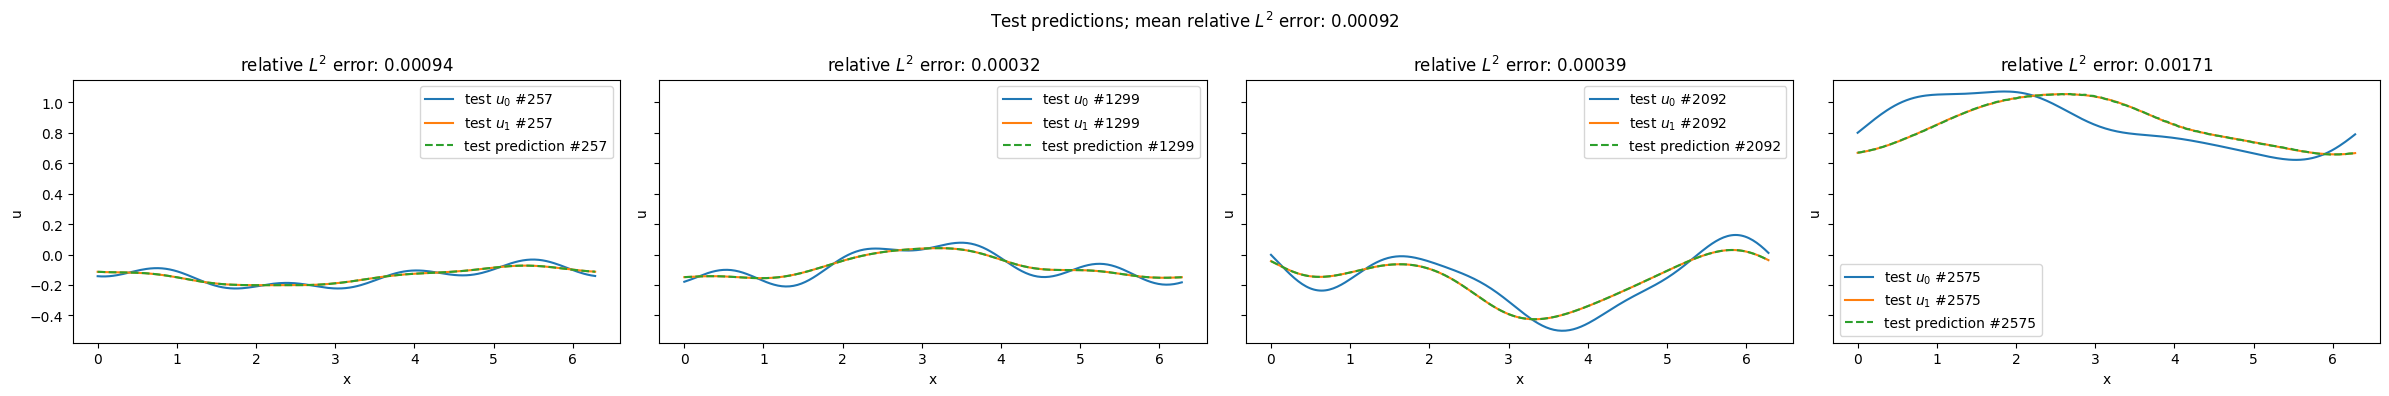

In [4]:
n_to_plot = 4
indices = rng.integers(test_u0.shape[0], size=n_to_plot)
fig, axes = plt.subplots(1, n_to_plot, figsize=(6*n_to_plot, 4),
                         sharex=True, sharey=True)
for ax, idx in zip(axes, sorted(indices)):
    ax.plot(x_space, test_u0[idx], label=f"test $u_0$ #{idx}")
    ax.plot(x_space, test_u1[idx], label=f"test $u_1$ #{idx}")
    ax.plot(x_space, test_predictions[idx], linestyle="--", label=f"test prediction #{idx}")
    ax.set_title(fr"relative $L^2$ error: {test_errors[idx]:.5f}")
    ax.set_xlabel("x")
    ax.set_ylabel("u")
    ax.legend()

fig.suptitle("Test predictions; " + fr"mean relative $L^2$ error: {test_errors.mean():.5f}");
fig.tight_layout()
